In [1]:
import numpy as np
import cv2
import glob
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score
from numpy import savetxt
import shutil
from tensorflow import keras
import tensorflow as tf
from tqdm import tqdm
tf.config.get_visible_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


<br><br>
## Sum of RGB differnces for 4700 normal images with k=3

In [2]:
path = glob.glob("D:/5FH/ML/images/clean-normal-small-clustered-centers-3/*.npy")
sum_diff_0_1 = []
sum_diff_0_2 = []
for file in tqdm(path):
    X = np.load(file)
    means = np.mean(X, axis=1)
    sorted_means = np.sort(means)
    sorted_clusters = []
    for i in range(0,3):
        for j in range(0,3):
            if sorted_means[i] == means[j]:
                sorted_clusters.append(X[j])
                break
    sum_diff_0_1.append(int(sum(abs(sorted_clusters[0] - sorted_clusters[1]))))
    sum_diff_0_2.append(int(sum(abs(sorted_clusters[0] - sorted_clusters[2]))))

100%|█████████████████████████████████████████████████████████████████████████████| 4636/4636 [00:20<00:00, 230.28it/s]


In [3]:
print(len(sum_diff_0_1))
print(len(sum_diff_0_2))

print(np.amax(sum_diff_0_1))
print(np.amax(sum_diff_0_2))
rr = np.asarray(sum_diff_0_1)
dd = np.asarray(sum_diff_0_2)

print(len(rr [rr > 138]))
print(len(dd [dd > 270]))

4636
4636
204
300
198
111


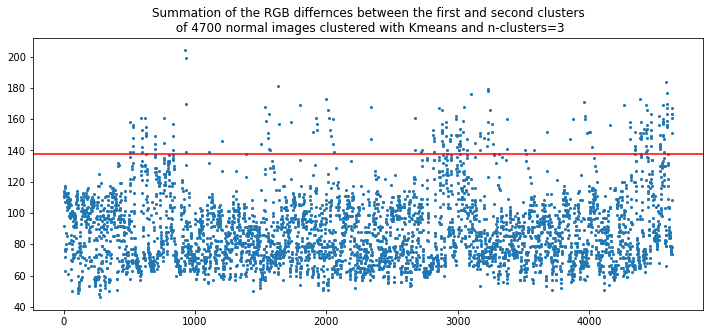

In [5]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 1, 1)

sum_diff_0_1 = np.asarray(sum_diff_0_1)

x = range(len(sum_diff_0_1))
y = sum_diff_0_1
ax.set_title("Summation of the RGB differnces between the first and second clusters\n of 4700 normal images clustered with Kmeans and n-clusters=3")
ax.scatter(x, y, marker='.',  linewidths=0.1)
ax.axhline(y = 138, color = 'r', linestyle = '-')
plt.show()

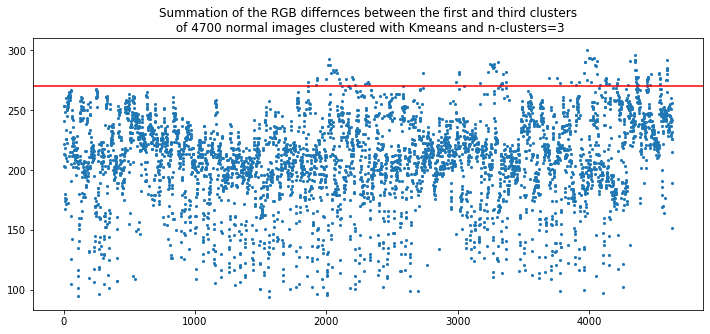

In [6]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 1, 1)

sum_diff_0_2 = np.asarray(sum_diff_0_2)

x = range(len(sum_diff_0_2))
y = sum_diff_0_2
ax.set_title("Summation of the RGB differnces between the first and third clusters\n of 4700 normal images clustered with Kmeans and n-clusters=3")
ax.scatter(x, y, marker='.',  linewidths=0.1)
ax.axhline(y = 270, color = 'r', linestyle = '-')
plt.show()


<br><br>
## Sum of RGB differences for 6200 fail images with k=3

In [7]:
path = glob.glob("D:/5FH/ML/images/clean-fail-clustered-centers-3/*.npy")
sum_diff_fail_0_1 = []
sum_diff_fail_0_2 = []
for file in tqdm(path):
    X = np.load(file)
    means = np.mean(X, axis=1)
    sorted_means = np.sort(means)
    sorted_clusters = []
    for i in range(0,3):
        for j in range(0,3):
            if sorted_means[i] == means[j]:
                sorted_clusters.append(X[j])
                break
    sum_diff_fail_0_1.append(int(sum(abs(sorted_clusters[0] - sorted_clusters[1]))))
    sum_diff_fail_0_2.append(int(sum(abs(sorted_clusters[0] - sorted_clusters[2]))))

100%|█████████████████████████████████████████████████████████████████████████████| 6191/6191 [00:27<00:00, 223.92it/s]


In [8]:
print(len(sum_diff_fail_0_1))
print(len(sum_diff_fail_0_2))

print(np.amin(sum_diff_fail_0_1))
print(np.amin(sum_diff_fail_0_2))
sum_diff_fail_0_1 = np.asarray(sum_diff_fail_0_1)
sum_diff_fail_0_2 = np.asarray(sum_diff_fail_0_2)
sum_diff_0_1 = np.asarray(sum_diff_0_1)
th = 138
print(len(sum_diff_fail_0_1 [sum_diff_fail_0_1 < th]))
print(len(sum_diff_fail_0_2 [sum_diff_fail_0_2 < 270]))
acc = (len(sum_diff_fail_0_1) - len(sum_diff_fail_0_1 [sum_diff_fail_0_1 < th]) ) / len(sum_diff_fail_0_1) * 100
acc_2 = (len(sum_diff_0_1) - len(sum_diff_0_1 [sum_diff_0_1 > th]) ) / len(sum_diff_0_1) * 100
print(acc)
print(acc_2)

6191
6191
113
177
31
2360
99.49927313842674
95.72907679033649


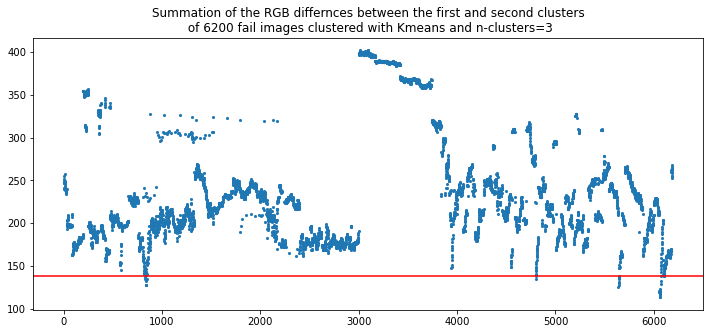

In [9]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 1, 1)

sum_diff_fail_0_1 = np.asarray(sum_diff_fail_0_1)

x = range(len(sum_diff_fail_0_1))
y = sum_diff_fail_0_1
ax.set_title("Summation of the RGB differnces between the first and second clusters\n of 6200 fail images clustered with Kmeans and n-clusters=3")
ax.scatter(x, y, marker='.',  linewidths=0.1)
ax.axhline(y = 138, color = 'r', linestyle = '-')
plt.show()

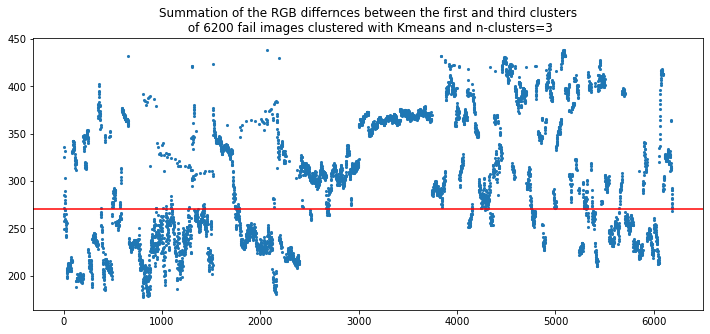

In [11]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 1, 1)

sum_diff_fail_0_2 = np.asarray(sum_diff_fail_0_2)

x = range(len(sum_diff_fail_0_2))
y = sum_diff_fail_0_2
ax.set_title("Summation of the RGB differnces between the first and third clusters\n of 6200 fail images clustered with Kmeans and n-clusters=3")
ax.scatter(x, y, marker='.',  linewidths=0.1)
ax.axhline(y = 270, color = 'r', linestyle = '-')
plt.show()


<br><br>
## Sum of RGB differences for 6600 normal images with k=5

In [12]:
path = glob.glob("D:/5FH/ML/images/clean-normal-clustered-centers-5/*.npy")
sum_diff_0_1 = []
sum_diff_0_2 = []
k = 0
for file in tqdm(path):
    if (file == "D:/5FH/ML/images/clean-normal-clustered-centers-5\\MyRecord2021-11-19T101958061.avi-img-123011.jpg.npy"):
        continue
    if (file == "D:/5FH/ML/images/clean-normal-clustered-centers-5\\MyRecord2021-11-19T101958061.avi-img-30381.jpg.npy"):
        continue
    if (k % 6 == 0):
        X = np.load(file, allow_pickle=True)
        means = np.mean(X, axis=1)
        sorted_means = np.sort(means)
        sorted_clusters = []
        for i in range(0,5):
            for j in range(0,5):
                if sorted_means[i] == means[j]:
                    sorted_clusters.append(X[j])
                    break
        sum_diff_0_1.append(int(sum(abs(sorted_clusters[0] - sorted_clusters[1]))))
        sum_diff_0_2.append(int(sum(abs(sorted_clusters[0] - sorted_clusters[2]))))
    k += 1

100%|██████████████████████████████████████████████████████████████████████████| 39623/39623 [00:30<00:00, 1297.52it/s]


In [13]:
print(len(sum_diff_0_1))
print(len(sum_diff_0_2))

print(np.amax(sum_diff_0_1))
print(np.amax(sum_diff_0_2))
rr = np.asarray(sum_diff_0_1)
dd = np.asarray(sum_diff_0_2)

print(len(rr [rr > 130]))
print(len(dd [dd > 200]))

6604
6604
430
449
86
126


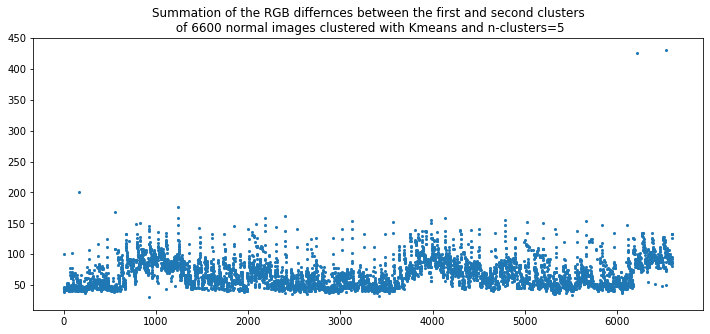

In [14]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 1, 1)

sum_diff_0_1 = np.asarray(sum_diff_0_1)

x = range(len(sum_diff_0_1))
y = sum_diff_0_1
ax.set_title("Summation of the RGB differnces between the first and second clusters\n of 6600 normal images clustered with Kmeans and n-clusters=5")
ax.scatter(x, y, marker='.',  linewidths=0.1)
# ax.axhline(y = 200, color = 'r', linestyle = '-')
plt.show()

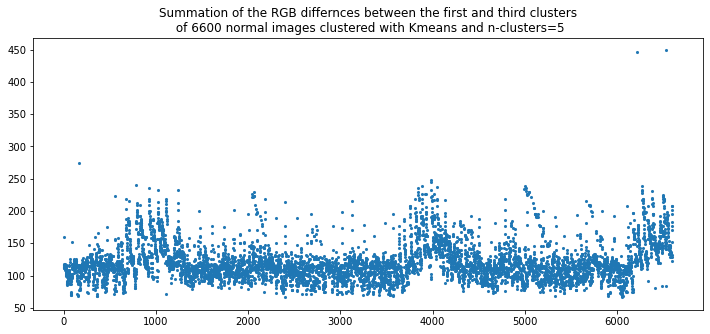

In [17]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 1, 1)

sum_diff_0_2 = np.asarray(sum_diff_0_2)

x = range(len(sum_diff_0_2))
y = sum_diff_0_2
ax.set_title("Summation of the RGB differnces between the first and third clusters\n of 6600 normal images clustered with Kmeans and n-clusters=5")
ax.scatter(x, y, marker='.',  linewidths=0.1)
# ax.axhline(y = 250, color = 'r', linestyle = '-')
plt.show()


<br><br>
## Sum of RGB differences for 6200 fail images with k=5

In [18]:
path = glob.glob("D:/5FH/ML/images/clean-fail-clustered-centers-5/*.npy")
sum_diff_0_1 = []
sum_diff_0_2 = []
for file in tqdm(path):
    X = np.load(file)
    means = np.mean(X, axis=1)
    sorted_means = np.sort(means)
    sorted_clusters = []
    for i in range(0,5):
        for j in range(0,5):
            if sorted_means[i] == means[j]:
                sorted_clusters.append(X[j])
                break
    sum_diff_0_1.append(int(sum(abs(sorted_clusters[0] - sorted_clusters[1]))))
    sum_diff_0_2.append(int(sum(abs(sorted_clusters[0] - sorted_clusters[2]))))

100%|█████████████████████████████████████████████████████████████████████████████| 6191/6191 [00:26<00:00, 229.44it/s]


In [19]:
print(len(sum_diff_0_1))
print(len(sum_diff_0_2))

print(np.amin(sum_diff_0_1))
print(np.amin(sum_diff_0_2))
rr = np.asarray(sum_diff_0_1)
dd = np.asarray(sum_diff_0_2)
print(len(rr [rr < 130]))
print(len(dd [dd < 200]))

6191
6191
65
148
533
78


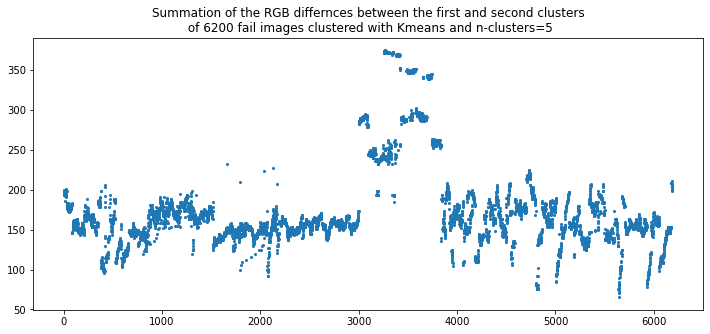

In [20]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 1, 1)

sum_diff_0_1 = np.asarray(sum_diff_0_1)

x = range(len(sum_diff_0_1))
y = sum_diff_0_1
ax.set_title("Summation of the RGB differnces between the first and second clusters\n of 6200 fail images clustered with Kmeans and n-clusters=5")
ax.scatter(x, y, marker='.',  linewidths=0.1)
# ax.axhline(y = 138, color = 'r', linestyle = '-')
plt.show()

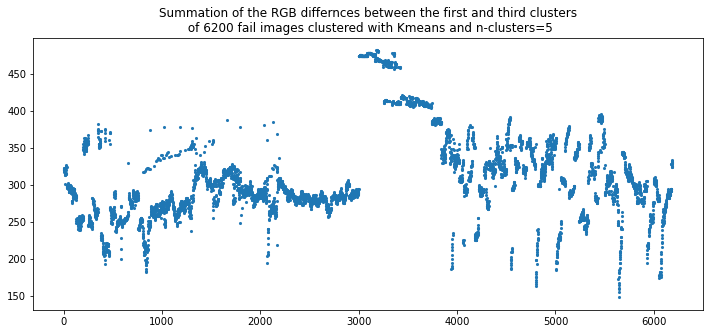

In [21]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 1, 1)

sum_diff_0_2 = np.asarray(sum_diff_0_2)

x = range(len(sum_diff_0_2))
y = sum_diff_0_2
ax.set_title("Summation of the RGB differnces between the first and third clusters\n of 6200 fail images clustered with Kmeans and n-clusters=5")
ax.scatter(x, y, marker='.',  linewidths=0.1)
# ax.axhline(y = 250, color = 'r', linestyle = '-')
plt.show()